Добрый день! Приступаю к проекту в котором я аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 
Проект раздеден на 2 этапа

Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализируйте A/B-тест:
Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

In [1]:
# импортируем все необходимые библиотеки, которые могут понадобиться в исследовании
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
import warnings

from scipy import stats as st

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
# снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

In [4]:
# обзор датафреймов

for i in [hypothesis, orders, visitors]:
    # исправим названия столбцов
    i.columns = [j.lower() for j in i.columns.values]
    display(i)
    # посчитаем дубликаты
    print('Дубликаты:', i.duplicated().sum())
    # посчитаем пропуски
    print('Пропуски:', i.isnull().sum().sum())
    # выведем информацию о фреймах
    i.info()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Дубликаты: 0
Пропуски: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Дубликаты: 0
Пропуски: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Дубликаты: 0
Пропуски: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Проанализировав полученные данные, мы можем сделать следущие корректировки перед обработкой данных:
- Исправить названия столбцов в базе orders
- Изменить тип данных для столбцов с данными
- Сгрупировать данные по группам А и B для анализа

In [5]:
#исправим названия столбцов
orders.columns = [j.replace('id', '_id') for j in orders.columns]
display(orders)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
# изменим тип данных для столбцов с датами

visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [7]:
gA = orders.query('group == "A"')
gB = orders.query('group == "B"')
c = list(set(gA['visitor_id']) & set(gB['visitor_id']))
h = orders.query('visitor_id == @c').sort_values(by='visitor_id')
h.head(10)

,transaction_id,visitor_id,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A
71,3679129301,8300375,2019-08-01,10510,B
823,2971973105,199603092,2019-08-27,2790,A
246,437656952,199603092,2019-08-02,3488,B
26,2223239646,199603092,2019-08-15,3488,A
134,62794304,199603092,2019-08-22,6976,A
1102,1941707234,199603092,2019-08-12,6438,A
1009,2670069237,232979603,2019-08-31,2640,B
1013,83566152,232979603,2019-08-31,60,A
590,3702128013,237748145,2019-08-20,1290,A


Вывод: Мы проанализировали и подготовили данные к дальнейшему анализу

Часть 1. Приоритизация гипотез.
Задачи
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Применение фреймворка ICE для приоритизации гипотез
Начнем на приоритезацию гипотез с одного из самых популярных способов приоритезации - ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)

In [8]:
hypothesis['ICE'] = round((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'],2)

hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).head(9)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


8 гипотеза набрала больше всего очков - "Запустить акцию, дающую скидку на товар в день рождения"
Запустить акцию, дающую скидку на товар в день рождения:

у компонентов impact и confidence - почти максимальные показатели, это не удивительно, ведь они отвечают за то насколько изменения повлияет на удвлетворение от продукта и насколько мы можем быть уверены в этом. Людям нравится получать подарки - это довольно очевидно, поэтому эта гипотеза так выделяется;
компонет efforts - отвечает за стоимость проведения - он средний, например, организовать рекламную рассылку или добавить привлекательный баннер на сайт, сообщающий об акции будет не так дорого
Применим другую модификацию метода, учитывающего охват пользователей

Применение фреймворка RICE для приоритизации гипотез
Приоритезируем гипотезы методом RICE (R от англ. reach, «охват»)

In [9]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).head(9)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Видим, что с добавлением охвата пользователей, приоритезация изменилась, разберём на примере акцией со скидкой на день рождения, сейчас она занимает, только 5е место - всё потому что компонент reach - имеет только 1 балл, действительно, изменения затронет намиеньшую группу польщователей, ведь акцией можно будет воспользоваться только 1 раз в год и в определенную дату

In [10]:
hypothesis[['hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


Значительный отрыв по очкам имеет 7я гипотеза - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", для неё:

reach - 10 баллов. добавив форму подписки на все основные страницы - ни будет пропущен ни один пользователей, зашедший на сайт
impact - 7 баллов. форма с подпиской совершенно новое предстовление для пользвателей сервиса, он может существенно оказать влияние
сonfidence - 8 баллов. данная оценка была дана на основе данных эскпеортов и нет никаких оснований ей не доверять, действительно, введение подписки довольно популярно в последние время и показывает положетельное влияние на диджитал продукты
efforts - 5 баллов. средняя оценка, добавление небольшой формы на сайт не такая большая и сложная задача для разработчкиоы

Выводы по разделу
На примерах, убедились в том, как работает приоритезация гипотез во фрейморках ICE и RICE, есть 1 компонент, который влияет на итоговый показатель обратно попропорционально - это efforts - чем он меньше, тем лучше, все остальные влияеют прямопропционально - это impact, сonfidence, efforts и reach(для RICE)

Несмотря на то, что данные методы очень похожи приоритезация гипотезы в зависимости от выбора того или иного, может существенно различаться, если мы ищем гипотезу, которая охватит больший круг пользователей, то выбираем RICE, если этот компонент не так важен или не для каждой гипотезы его можно объективно оценть, то ICE.

В данном случае, для проведения A/B теста возьмём гипотезу №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", т.к. у нас есть необходимая оценка и ресурсы для проведения

Часть 2. Анализ A/B-теста
Задачи
Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

1. Постройте график кумулятивной выручки по группам.

Чтобы построить графики по кумулятивным данным, необходимо собрать соответствующий агрегированный датафрейм, содержащий информацию о дате, группе (А или В), кумулятивном количестве заказов и пользователей их оформивших, среднем чеке и о кумулятивном количестве посетителей магазина.

In [11]:
# создаем массив уникальных пар значений дат и групп теста

dates_group = orders[['date', 'group']].drop_duplicates()

In [12]:
# получаем агрегированные кумулятивные по дням данные о заказах 

orders_aggregated = (dates_group.apply
    (lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
        .agg({
            'date' : 'max', 
            'group' : 'max', 
            'transaction_id' : 'nunique', 
            'visitor_id' : 'nunique', 
            'revenue' : 'sum'
             }), 
    axis=1
    )
        .sort_values(by=['date','group'])
                    )

orders_aggregated.head(10)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996
499,2019-08-04,A,84,77,425699
498,2019-08-04,B,78,75,489567
698,2019-08-05,A,109,100,549917
699,2019-08-05,B,101,98,581995


In [13]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 

visitors_aggregated = (dates_group.apply
    (lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
        .agg({
            'date' : 'max', 
            'group' : 'max',  
            'visitors' : 'sum'
             }), 
    axis=1
    )
        .sort_values(by=['date','group'])
                      )

visitors_aggregated.head(10)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803
499,2019-08-04,A,2562
498,2019-08-04,B,2573
698,2019-08-05,A,3318
699,2019-08-05,B,3280


In [14]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

cumulative_data = (orders_aggregated.merge
    (visitors_aggregated, 
     left_on=['date', 'group'], 
     right_on=['date', 'group']
    )
                  )

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head(10)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


In [15]:
# проверим, совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных
for i in [cumulative_data, visitors, orders]:
    print(i.date.max())
    print(i.date.min())
    print()

2019-08-31 00:00:00
2019-08-01 00:00:00

2019-08-31 00:00:00
2019-08-01 00:00:00

2019-08-31 00:00:00
2019-08-01 00:00:00



In [16]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

Построение графика кумулятивной выручки по группам
Построим график кумулятивной выручки по группам.

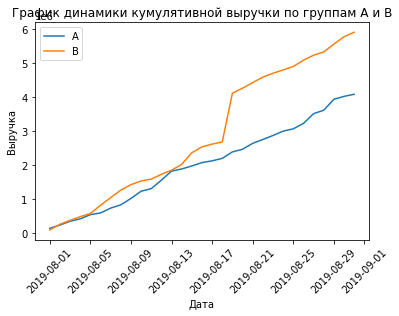

In [17]:
plt.plot(cumulative_revenue_A['date'],
         cumulative_revenue_A['revenue'],
         label='A')
plt.plot(cumulative_revenue_B['date'],
         cumulative_revenue_B['revenue'],
         label='B')

plt.title('График динамики кумулятивной выручки по группам А и В')
plt.ylabel("Выручка")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.legend()
plt.show()

По графику видим следующее:

группа B лидирирует на всём периоде
у группы B произошёл резкий рост в период с 18 на 19 августа, на это могут быть 2 причины:
- в группу попал анамально дорогой заказ
- в этот день было много заказов

2. Построение графика кумулятивного среднего чека по группам.

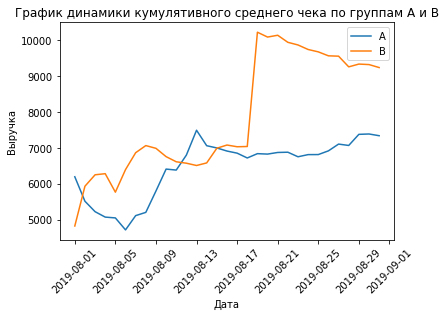

In [18]:
plt.plot(cumulative_revenue_A['date'], 
         cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], 
         label='A')

plt.plot(cumulative_revenue_B['date'], 
         cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], 
         label='B')

plt.title('График динамики кумулятивного среднего чека по группам А и В')
plt.ylabel("Выручка")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.legend()
plt.show()

На графиках видим:

- в первой половине теста графики ведут себя не стабильно, есть как сильные росты, так и падения
- на графике среднего чека анамальное значения для группе B в период с 08.17 по 08.21 уже более явное
- к коцу периода коммулятивный средний чек группы B, выше, чем у А, но стоит учесть, что были анамальные значения
- к концу периода у группы А есть тенденция к росту, а у B к снижению

3. Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

In [19]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = (cumulative_revenue_A
        .merge(cumulative_revenue_B, 
               left_on='date', 
               right_on='date', 
               how='left', 
               suffixes=['A', 'B']
              )
                            )

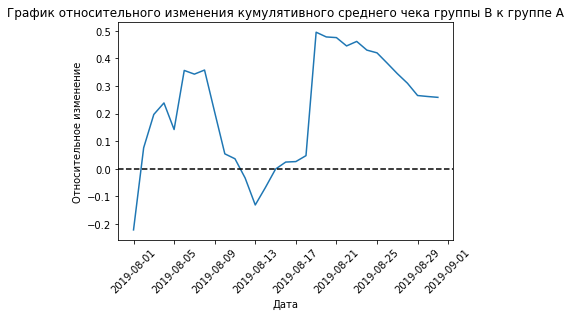

In [20]:
# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/
         (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel("Дата")
plt.ylabel('Относительное изменение')
plt.xticks(rotation=45)
plt.show()

На графике видим резкие скачки, это может значит, что именно в пиковый дни на графике, были сделаны анамально дорогие заказы.

4. Постройте график кумулятивного среднего количества заказов на посетителя по группам

In [21]:
# считаем кумулятивное среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

In [22]:
# отделяем данные по группе A и В
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

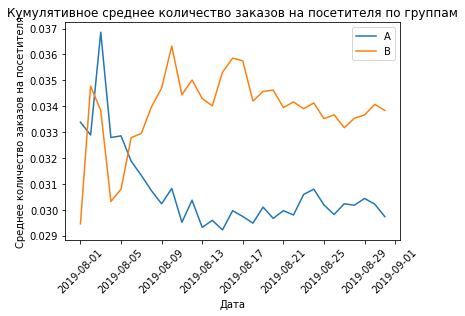

In [23]:
# строим графики
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.legend()
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.ylabel('Среднее количество заказов на посетителя')
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.show()

На графике видим, что в первые дни конверся у группы А была выше, чем у В, но спустя 6 дней со времени запуска теста, это поменялось:

- для А конверсия держалась на уровне от 0.029 до 0.031,
- для B от 0.034 до 0.036
Предварительно гипотеза подтверждается, с новововведениями на сайте - конверсия растёт

5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [24]:
# собираем данные в одном датафрейме
merged_cumulative_conversions = (cumulative_data_A[['date','conversion']]
        .merge(cumulative_data_B[['date','conversion']], 
               left_on='date', 
               right_on='date', 
               how='left', 
               suffixes=['A', 'B']
              )
                                )

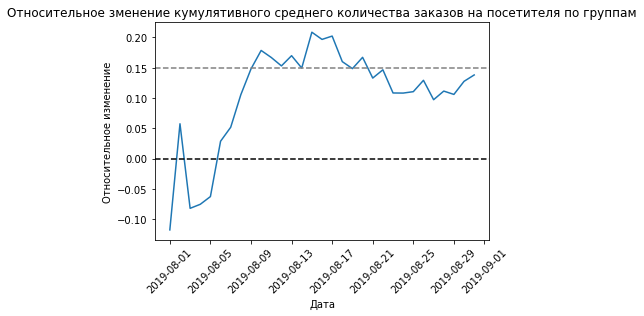

In [25]:
plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversionB']/
         merged_cumulative_conversions['conversionA']-1
        )

plt.axhline(y=0.0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительное зменение кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Относительное изменение')
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.show()

Видим что относительный прирост сначала был отрицательным, но после 5 августа пошел сильный рост. С 9 августа стабилизировался.

6. Постройте точечный график количества заказов по пользователям.

In [26]:
# подсчитаем количесво заказов по пользователям
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.sort_values(by='transaction_id', ascending=False).head(10)

,visitor_id,transaction_id
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


In [27]:
orders_by_users.columns = ['visitor_id', 'orders']
aa = orders_by_users.groupby('orders').agg({'visitor_id' : 'count'})
aa

,visitor_id
orders,
1,937
2,64
3,17
4,3
5,6
8,1
9,1
11,2


Построим гистрограмму распределения количества заказов на одного пользователя.

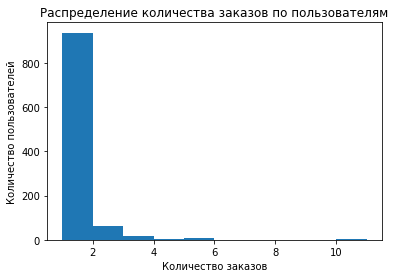

In [28]:
plt.hist(orders_by_users['orders'])
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()

Построим точечную диаграмму распределения количества заказов на одного пользователя

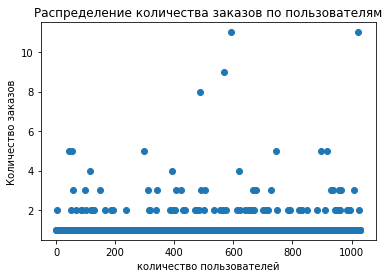

In [29]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'])
plt.title('Распределение количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('количество пользователей')
plt.show()

Больше всего пользователей с 1м или 2мя заказами, остальные довольно редкие но есть уникальные, которые сделали до 11 заказов за период.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [30]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершили больше чем 2 заказа. И 1% пользователей заказывали более 4 раз.
Примем верхнюю границу в 4 заказа.

8. Постройте точечный график стоимостей заказов

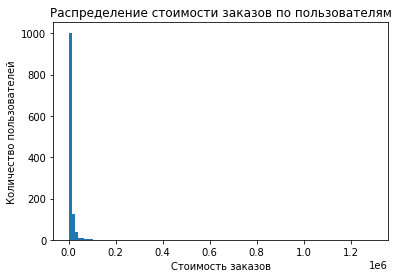

In [31]:
plt.hist(orders['revenue'], bins=100) 
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество пользователей')
plt.show()

Построим точечную диаграмму распределения стоимостей заказов

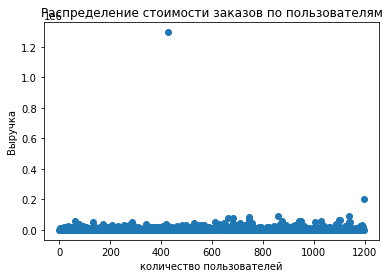

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('количество пользователей')
plt.ylabel('Выручка')
plt.show()

Видим сильные выбросы. Поправим график для наглядности.

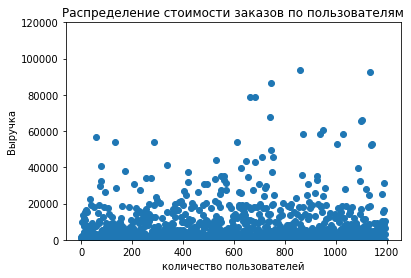

In [33]:
plt.ylim(0, 120000)
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('количество пользователей')
plt.ylabel('Выручка')
plt.show()

Видим, что основные значения лежат в пределах до приблизтельно 20 000, по графику всё ещё сложно оценить границу анамально большого заказа, воспользуемся подсчётом процентелией

9. Посчитайте 95-й и 99-й перцентили стоимости заказов.

In [34]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов превышают стоимоть в 28 000 рублей, 1% превышают 58 233,2 рубля. Примем границу в 58 233.

Вывод: Разумно выбрать 4 заказа на одного пользователя за верхнюю границу числа заказов и 58 233 рубля как верхнюю границу стоимости заказа, и отсеять аномальных пользователей по ней.

10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы:

Нулевая гипотеза: Статистически значимых различий в среднем количестве заказов между группами по "сырым" данным нет.

Альтернативная гипотеза: Статистически значимые различия в среднем количестве заказов между группами по "сырым" данным есть.
Коэффициент альфа: 0.05

In [35]:
# Сформулируем гипотезы.
H0 = 'Статистически значимых различий в среднем количестве заказов между группами по "сырым" данным нет.'

H1 = 'Статистически значимые различия в среднем количестве заказов между группами по "сырым" данным есть.'
alpha = 0.05

In [36]:
alpha = 0.05

In [37]:
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_daily_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_daily_b', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b']


data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

data.head(10)

,date,orders_daily_a,revenue_per_date_a,orders_daily_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277


Названия столбцов данных:

date — дата;
orders_daily_a — количество заказов в выбранную дату в группе A;
revenue_per_date_a — суммарная выручка в выбранную дату в группе A;
orders_daily_b — количество заказов в выбранную дату в группе B;
revenue_per_date_b — суммарная выручка в выбранную дату в группе B;
orders_cummulative_a — суммарное число заказов до выбранной даты включительно в группе A;
revenue_cummulative_a — суммарная выручка до выбранной даты включительно в группе A;
orders_cummulative_b — суммарное количество заказов до выбранной даты включительно в группе B;
revenue_cummulative_b — суммарная выручка до выбранной даты включительно в группе B;
visitors_per_date_a — количество пользователей в выбранную дату в группе A;
visitors_per_date_b — количество пользователей в выбранную дату в группе B;
visitors_cummulative_a — количество пользователей до выбранной даты включительно в группе A;
visitors_cummulative_b — количество пользователей до выбранной даты включительно в группе B.
Создадим переменные orders_by_users_A и orders_by_users_B со столбцами 'visitor_id', 'orders'. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [38]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A.columns = ['visitor_id', 'orders']

orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B.columns = ['visitor_id', 'orders']

Объявим переменные sample_A и sample_B, в которых пользователям из разных групп будет соответствовать количество заказов.

In [39]:
sample_A = pd.concat([orders_by_users_A['orders'],
                      pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_A['orders'])),
                                name='orders')],axis=0)

sample_B = pd.concat([orders_by_users_B['orders'],
                      pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_B['orders'])),
                                name='orders')],axis=0) 

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [40]:
p_value = stats.mannwhitneyu(sample_A, sample_B)[1]

print("P-value: {0:.3f}".format(p_value))

if (p_value < alpha):
        print('Отвергаем нулевую гипотезу:', H1)
else:
        print('Не получилось отвергнуть нулевую гипотезу:', H0)

print("Относительный прирост группы В к группе А: {0:.3%}".format(sample_B.mean() / sample_A.mean() - 1))

P-value: 0.017
Отвергаем нулевую гипотезу: Статистически значимые различия в среднем количестве заказов между группами по "сырым" данным есть.
Относительный прирост группы В к группе А: 13.808%


По «сырым» данным различия в среднем числе заказов между группами A и B есть, p_value < 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, следует отвергнуть.
Относительный проигрыш группы А равен 13.8%.

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

In [41]:
# Сформулируем гипотезы.
H0 = 'Статистически значимых различий в среднем чеке между группами по "сырым" данным нет.'
H1 = 'Статистически значимые различия в среднем чеке между группами по "сырым" данным есть.'
alpha = 0.05

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [42]:
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print('P-value: {0:.3f}'.format(p_value))

if (p_value < alpha):
        print('Отвергаем нулевую гипотезу:', H1)
else:
        print('Не получилось отвергнуть нулевую гипотезу:', H0)

print('Относительный прирост группы В к группе А: {0:.3%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


P-value: 0.729
Не получилось отвергнуть нулевую гипотезу: Статистически значимых различий в среднем чеке между группами по "сырым" данным нет.
Относительный прирост группы В к группе А: 25.871%


Так как тест показал, что гипотезу мы не отвергаем, то можно утверждать, что разница в 25.87% между группами В и А не является статистически значимым результатом.

12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [43]:
# cделаем срезы пользователей с числом заказов больше 4
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > 4]['visitor_id'],
        orders_by_users_B[orders_by_users_B['orders'] > 4]['visitor_id'],
    ],
    axis=0,
)
# cделаем срезы пользователей совершивших заказы дороже 58 233
users_with_expensive_orders = orders[orders['revenue'] > 58233]['visitor_id']
# объединим их в таблицу
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print()
print('Всего', abnormal_users.shape[0], 'аномальных пользователей') 

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64

Всего 15 аномальных пользователей


In [44]:
many_orders = np.percentile(orders_by_users['orders'], 99)
expensive_orders = np.percentile(orders['revenue'], 99)

# cделаем срезы пользователей с числом заказов больше 4
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > many_orders]['visitor_id'],
        orders_by_users_B[orders_by_users_B['orders'] > many_orders]['visitor_id'],
    ],
    axis=0,
)
# cделаем срезы пользователей совершивших заказы дороже 58 233
users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitor_id']
# объединим их в таблицу
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print()
print('Всего', abnormal_users.shape[0], 'аномальных пользователей') 

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64

Всего 15 аномальных пользователей


Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [45]:
sample_A_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B_filtered = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [46]:
# Сформулируем гипотезы.
H0 = 'Статистически значимых различий в среднем количестве заказов между группами по "очищенным" данным нет.'
H1 = 'Статистически значимые различия в среднем количестве заказов между группами по "очищенным" данным есть.'
alpha = 0.05

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [47]:
p_value = stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]
print('P-value: {0:.3f}'.format(p_value))

if (p_value < alpha):
        print('Отвергаем нулевую гипотезу:', H1)
else:
        print('Не получилось отвергнуть нулевую гипотезу:', H0)

print('Относительный прирост группы В к группе А: {0:.3%}'.format(sample_B_filtered.mean()/sample_A_filtered.mean()-1)) 

P-value: 0.014
Отвергаем нулевую гипотезу: Статистически значимые различия в среднем количестве заказов между группами по "очищенным" данным есть.
Относительный прирост группы В к группе А: 15.331%


13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [48]:
# Сформулируем гипотезы.
H0 = 'Статистически значимых различий в среднем чеке между группами по "очищенным" данным нет.'
H1 = 'Статистически значимые различия в среднем чеке между группами по "очищенным" данным есть.'
alpha = 0.05

In [49]:
p_value = stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                                                   np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
                             orders[np.logical_and(orders['group'] == 'B',
                                                   np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1]
print('P-value: {0:.3f}'.format(p_value))

if (p_value < alpha):
        print('Отвергаем нулевую гипотезу:', H1)
else:
        print('Не получилось отвергнуть нулевую гипотезу:', H0)

print('Относительный прирост группы В к группе А: {0:.3%}'
      .format(orders[np.logical_and(orders['group'] == 'B',
                                   np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()/
             orders[np.logical_and(orders['group'] == 'A',
                                   np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()- 1)) 

P-value: 0.851
Не получилось отвергнуть нулевую гипотезу: Статистически значимых различий в среднем чеке между группами по "очищенным" данным нет.
Относительный прирост группы В к группе А: -0.575%


На «очищенных» данных P-value вырос, различий в среднем чеке нет. Без выбросов группа А наоборот показала очень незначительный прирост на 0,58%.

Общий вывод
В данной работе мы достигли поставленных задач:

1. Подготовили данные к анализу, исправили названия и форматы столбцов.

2. Часть приоритизации гипотез.

Изучили гипотезы, предоставленных отделом Маркетинга, провели их ранжирование с применением методов ICE и RICE.

Согласно методу ICE, в первую очередь необходимо обратить внимание на гипотезы:

"Запустить акцию, дающую скидку на товар в день рождения";
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей";
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".
Если ранжирование гипотез должно включать в себя и охват пользователей интернет-магазина (метод RICE), то места необходимо распределить таким образом:

"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа";
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".
Как видно, в обоих методах в топе 3 находятся гипотезы под номерами 0 и 7 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" соответственно. На них сделать особый акцент.

3. Часть проведения и анализа А/В теста.

В данной части изучили графики с кумулятивными значениями, на основании которых было обнаружено абсолютное превосходство группы В над групой А в части конверсии, выручки, среднего чека. Также заметили сильные выбросы как в стоимости заказов, так и в количесве заказов на одного пользователя.
Подсчетом перцетилей определили верхние границы количества и стоимости заказов.

4. Часть статистического анализа.

Есть статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий. Конверсия группы В выше, чем в А, на 14-15%;

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по «очищенным» данным;

График различия среднего количества заказов между группами B и A показывает, что результаты группы В стабильно лучше группы А;

График различия среднего чека говорит о том, что результаты группы B лучше группы А более чем на 20%, но ухудшаются день ото дня;

На основании вышеизложенного тест следует остановить, зафиксировав победу группы B (ее конверсия значительно выше конверсии группы А).